# PHÂN TÍCH DỮ LIỆU, ĐẶT VÀ TRẢ LỜI CÂU HỎI

## 1. Import thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Đọc dữ liệu từ file csv

In [3]:
anime23_df = pd.read_csv('anime23_preprocessing.csv')

In [4]:
anime23_df.head()

,anime_id,Name,Score,Genres,Type,Episodes,Status,Producers,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Finished Airing,Bandai Visual,Sunrise,Original,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1.0,Finished Airing,"Sunrise, Bandai Visual",Bones,Original,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Finished Airing,Victor Entertainment,Madhouse,Manga,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,PG - Children,4240.0,5126,14,6413.0,15001


## 3. Đặt câu hỏi

#### Đặc điểm chung của các anime nổi tiếng là gì?

Việc tìm ra được điểm chung của các anime nổi tiếng hiện tại có thể giúp:
- Về phía nhà sản xuất, các công ty mua bản quyền phim để chiếu trên nền tảng của mình:
    - Giúp nhà sản xuất nhận ra được những đặc điểm chung của các phim nổi tiếng từ đó có thể tìm kiếm hay sản xuất dựa trên các đặc điểm đó, để có thể dễ dàng thu hút được lượng người xem lớn.
    - Giúp các nền tảng mua bản quyền phim để chiếu có các tiêu chí cụ thể để lựa chọn anime mới, có tiềm năng đưa về nền tảng nhầm đạt được doanh thu, doanh số cao.
    - Giúp phát hiện ra xu hướng, thị hiếu của khán giả hiện giờ, ngoài ra cũng có thể tìm ra được những điểm riêng đặc biệt mà có thể phát triển sau này.
    - Có thể giúp phát hiện các nhà sản xuất  chưa nổi tiếng có thể có thêm một số thông tin lý do tại sao anime mình ít lượt theo dõi, từ đó có thể cải thiện hơn về chất lượng sao này dựa trên những thông tin nhận được
- Về phía người xem anime:
    - Giúp biết được các loại phim nổi tiếng sẽ có những đặc điểm gì từ đó cũng có thể lựa chọn ra những phim mới để theo dõi.
    

## 4. Trả lời câu hỏi

Để trả lời câu hỏi này đầu tiên em sẽ lấy 2500 anime có xếp hạng `Popularity` cao nhất. Em lấy 25000 vì bộ dữ liệu mình có gần 25000 anime nên em lấy 1/10 số anime top đầu để đánh giá.

Đầu tiên xếp các anime theo thứ tự Popularity

In [39]:
df_sorted_pop_asc = anime23_df.sort_values(by='Popularity', ascending=True)
df_sorted_pop_asc.head()

,anime_id,Name,Score,Genres,Type,Episodes,Status,Producers,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
24904,55735,Shijuuku Nichi,NaN,UNKNOWN,Music,1.0,Finished Airing,UNKNOWN,UNKNOWN,Original,PG-13 - Teens 13 or older,0.0,0,0,NaN,0
24498,55227,Night Flower,NaN,Boys Love,Music,1.0,Finished Airing,UNKNOWN,UNKNOWN,Other,UNKNOWN,0.0,0,0,NaN,0
24494,55218,The Little Name,NaN,UNKNOWN,Music,1.0,Finished Airing,UNKNOWN,UNKNOWN,Unknown,G - All Ages,0.0,0,0,NaN,0
24468,55178,Ridin' (IMLAY Remix),NaN,UNKNOWN,Music,1.0,Finished Airing,UNKNOWN,UNKNOWN,Original,G - All Ages,0.0,0,0,NaN,0
24464,55174,Bad Boy (Slom Remix),NaN,UNKNOWN,Music,1.0,Finished Airing,UNKNOWN,UNKNOWN,Original,G - All Ages,0.0,0,0,NaN,0


Ở đây ta thấy các cột `Popularity` có giá trị 0 là do cột chưa được đánh giá độ phổ biến do có quá ít thông tin về anime do đó ta phải loại bỏ những cột này.

In [40]:
df_sorted_pop_asc = df_sorted_asc[df_sorted_asc['Popularity'] != 0]
df_sorted_pop_asc.head()

,anime_id,Name,Score,Genres,Type,Episodes,Status,Producers,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
7428,16498,Shingeki no Kyojin,8.54,"Action, Award Winning, Drama, Suspense",TV,25.0,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,R - 17+ (violence & profanity),107.0,1,163844,2660903.0,3744541
1393,1535,Death Note,8.62,"Supernatural, Suspense",TV,37.0,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",Madhouse,Manga,R - 17+ (violence & profanity),74.0,2,167586,2619479.0,3713315
3961,5114,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",TV,64.0,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,R - 17+ (violence & profanity),1.0,3,217606,2020030.0,3176556
10408,30276,One Punch Man,8.50,"Action, Comedy",TV,12.0,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",Madhouse,Web manga,R - 17+ (violence & profanity),127.0,4,62408,2131099.0,3058666
6596,11757,Sword Art Online,7.20,"Action, Adventure, Fantasy, Romance",TV,25.0,Finished Airing,"Aniplex, Genco, DAX Production, ASCII Media Wo...",A-1 Pictures,Light novel,PG-13 - Teens 13 or older,3055.0,5,67014,2072240.0,2951821


Tiếp theo ta lấy 2500 anime có độ phổ biến top đầu vào dataframe `top_pop_anime23_df`

In [44]:
top_pop_anime23_df = df_sorted_pop_asc.iloc[:2500,:]
top_pop_anime23_df.shape

(2500, 16)

Sau khi đã hoàn tất việc lấy 2500 anime có độ phổ biến cao nhất, tiếp theo chúng ta sẽ tìm điểm chung của những anime này thông qua các khảo sát về:
- Thể loại của phim (Genres)
- Hình thức chiếu (Type)
- Số tập (Episodes)
- Nguồn (Source)
- Giới hạn độ tuổi (Rating)

In [50]:
single_columns = ['Type', 'Source', 'Rating']
single_cate_profile = pd.DataFrame(index=["num_diff_vals", "distribution"])
num_diff_vals = top_pop_anime23_df[single_columns].nunique()
distribution = top_pop_anime23_df[single_columns].agg(lambda column: pd.Series(column).value_counts().to_dict())
single_cate_profile[single_columns] = [num_diff_vals, distribution]

single_cate_profile

,Type,Source,Rating
num_diff_vals,7,15,7
distribution,"{'TV': 1764, 'Movie': 341, 'OVA': 181, 'Specia...","{'Manga': 1111, 'Light novel': 487, 'Original'...","{'PG-13 - Teens 13 or older': 1632, 'R - 17+ (..."


In [69]:
# Tạo dataframe kết quả
def split_and_melt(column):
    df_split = column.str.split(', ', expand=True).melt().drop('variable', axis=1)
    return df_split['value']
long_df = top_pop_anime23_df[['Genres']].agg(split_and_melt)
distribution = long_df.agg(lambda column: pd.Series(column).value_counts().to_dict())

distribution = distribution['Genres']

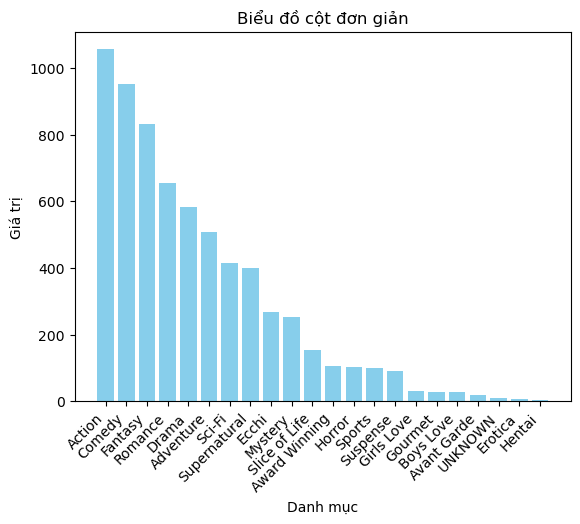

In [70]:
# Vẽ biểu đồ cột
plt.bar(distribution.keys(), distribution.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
# Thêm tiêu đề và nhãn cho trục
plt.title('Biểu đồ cột đơn giản')
plt.xlabel('Danh mục')
plt.ylabel('Giá trị')

# Hiển thị biểu đồ
plt.show()

Đầu tiên với thể loại phim ta sẽ xem các thể loại nào

# PHẢN ÁNH

## 1. Bạn đã gặp những khó khăn gì?

### Hân

### Khuê

### Tuấn

## 2. Bạn đã học được những gì

### Hân

### Khuê

### Tuấn

## 3. Nếu có nhiều thời gian hơn bạn sẽ làm gì?